In [83]:
## Olá meninas!!! Rodarei esse projeto em python 3.8. Esse projeto possui um requeirements.txt
## nele estão presentes as bibliotecas e os pacotes necessários para ele. Caso seu interpretador
## não encontre algum pacote, rode o seguinte no terminal: pip install -r requirements.txt ou
## ! pip install -r requirements.txt (no Jupyter notebook). Bons estudos!! 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import datasets
from io import StringIO
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import metrics
%matplotlib inline

<a href='https://www.kdnuggets.com/2020/01/decision-tree-algorithm-explained.html'> Aprenda mais sobre decision trees. </a>

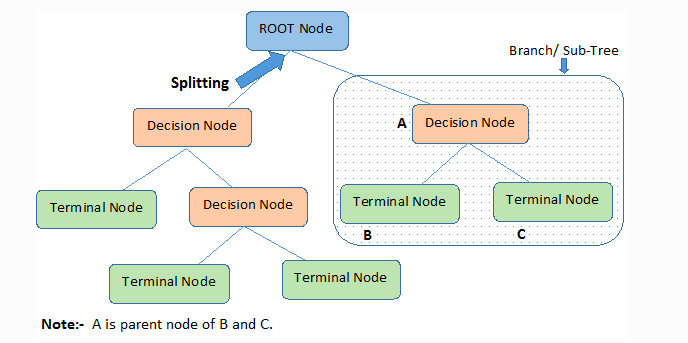

In [84]:
## Faremos o download do dataset e vamos explorar os dados nele.    

dataset = pd.read_csv('bank.csv')

In [85]:
dataset.describe() ## -> Aqui podemos ver as colunas numéricas. 

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

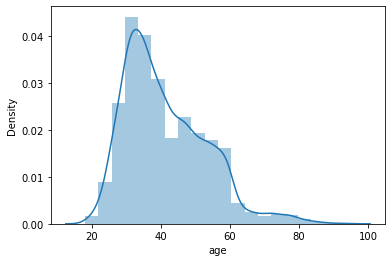

In [86]:
## Vamos visualizar os dados graficamente. 

sns.distplot(dataset.age, bins=20)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration', ylabel='Density'>

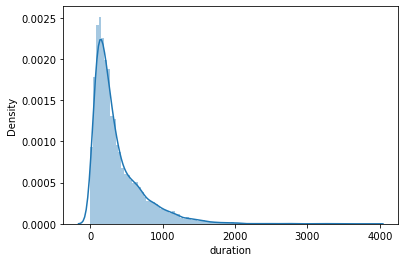

In [87]:
sns.distplot(dataset.duration, bins=100)


In [88]:
dataset.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'deposit'],
      dtype='object')

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

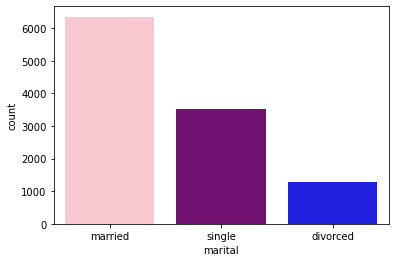

In [89]:
sns.countplot(dataset.marital, palette=['pink', 'purple', 'blue'])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

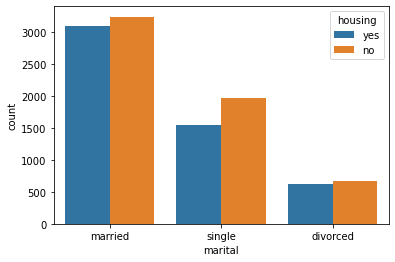

In [90]:
sns.countplot(dataset.marital, hue=dataset.housing)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

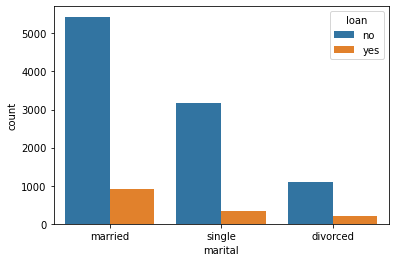

In [91]:
sns.countplot(dataset.marital, hue=dataset.loan)


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

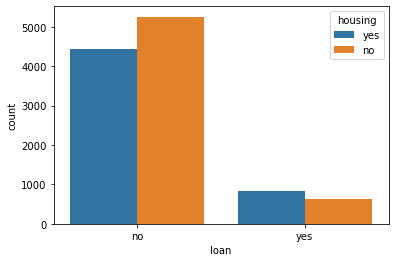

In [92]:
sns.countplot(dataset.loan, hue=dataset.housing)


In [93]:
## Vamos agora compreender se no dataset temos dados faltantes ou NAN

dataset[dataset.isnull().any(axis=1)].count()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [94]:
dataset[dataset.isna().any(axis=1)].count()


age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [95]:
## A primeira ideia do projeto é de trabalharmos dados categóricos

# Vamos combinar trabalhos similares numa mesma categoria. 

dataset['job'] = dataset['job'].replace(['management', 'admin.'], 'white-collar')
dataset['job'] = dataset['job'].replace(['services','housemaid'], 'pink-collar')
dataset['job'] = dataset['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [96]:
dataset.poutcome.value_counts()
## Ohter e unknown são mesma categoria, vamos combiná-los.

dataset['poutcome'] = dataset['poutcome'].replace(['unknown'], 'other')


In [97]:
## Vamos pegar colunas yes/no e transformá-las em boolen para nosso processo de construção da árvore.
bool_columns = list()
for coluna in dataset.columns:
    if dataset[coluna].unique().tolist() == ['yes', 'no'] or \
        dataset[coluna].unique().tolist() == ['no', 'yes']:
        dataset[coluna] = dataset[coluna].map({'yes':1, 'no':0})
        bool_columns.append(coluna)

In [98]:
dataset[bool_columns]

,default,housing,loan,deposit
0,0,1,0,1
1,0,0,0,1
2,0,1,0,1
3,0,1,0,1
4,0,0,0,1
...,...,...,...,...
11157,0,1,0,0
11158,0,0,0,0
11159,0,0,0,0
11160,0,0,1,0


In [99]:
# pdays: número de dias que se passaram desde que o cliente foi contatado
    # pela última vez em uma campanha anterior
# -1 significa que o cliente não foi contatado anteriormente.

print("Clientes que não foram contatados nos últimos meses     :", len(dataset[dataset.pdays==-1]))
print("Máximo de dias após contato    :", dataset['pdays'].max())

Clientes que não foram contatados nos últimos meses     : 8324
Máximo de dias após contato    : 854


In [100]:
# Vimos que clientes com -1 em pdays não foram contatados anteriormente. 
## Para o valor -1 não influenciar no comportamento do algorítmo, vamos
## substituí-lo por um valor bem alto, afim de demonstrar pouca influência.

dataset.loc[dataset['pdays'] == -1, 'pdays'] = 10000

In [101]:
dataset.pdays.unique()

array([10000,   166,    91,   147,   170,   150,   171,   126,   182,
         110,   198,   174,   175,    27,   128,   100,   177,   167,
         122,   183,   195,   133,   178,    34,    10,   163,   184,
         154,    99,    93,     2,   242,   272,    76,   160,    90,
         196,   246,   238,   203,   268,   189,   267,    92,     9,
          88,    85,   210,   257,   261,   270,   106,   199,   112,
          41,   294,   231,   239,   302,   135,   307,   222,   138,
         323,   141,   320,   264,   316,   315,   256,   146,   328,
          74,   148,   327,   341,   145,   266,   234,   345,   318,
         325,   274,   343,   260,   305,   344,   254,   180,   340,
          82,   181,   278,   153,     4,   349,   334,   176,    87,
         269,    86,   169,    83,    79,     6,   259,    13,   161,
         350,    84,    80,   164,    22,   296,    66,   263,   333,
          17,    89,    78,   286,   337,   364,   188,   342,   363,
         352,   295,

In [102]:
## Vamos criar uma coluna de pdays mais recentes. 

dataset['recent_pdays'] = np.where(dataset['pdays'], 1/dataset.pdays, 1/dataset.pdays)

# Drop 'pdays'
dataset.drop('pdays', axis=1, inplace = True)

In [103]:
dataset['recent_pdays'].unique()

array([1.00000000e-04, 6.02409639e-03, 1.09890110e-02, 6.80272109e-03,
       5.88235294e-03, 6.66666667e-03, 5.84795322e-03, 7.93650794e-03,
       5.49450549e-03, 9.09090909e-03, 5.05050505e-03, 5.74712644e-03,
       5.71428571e-03, 3.70370370e-02, 7.81250000e-03, 1.00000000e-02,
       5.64971751e-03, 5.98802395e-03, 8.19672131e-03, 5.46448087e-03,
       5.12820513e-03, 7.51879699e-03, 5.61797753e-03, 2.94117647e-02,
       1.00000000e-01, 6.13496933e-03, 5.43478261e-03, 6.49350649e-03,
       1.01010101e-02, 1.07526882e-02, 5.00000000e-01, 4.13223140e-03,
       3.67647059e-03, 1.31578947e-02, 6.25000000e-03, 1.11111111e-02,
       5.10204082e-03, 4.06504065e-03, 4.20168067e-03, 4.92610837e-03,
       3.73134328e-03, 5.29100529e-03, 3.74531835e-03, 1.08695652e-02,
       1.11111111e-01, 1.13636364e-02, 1.17647059e-02, 4.76190476e-03,
       3.89105058e-03, 3.83141762e-03, 3.70370370e-03, 9.43396226e-03,
       5.02512563e-03, 8.92857143e-03, 2.43902439e-02, 3.40136054e-03,
      

In [104]:
## Vamos separar quais colunas serão utilizadas!!

colunas = ['job', 'marital', 'age', 'education', 'balance', 'duration', 
'campaign', 'previous', 'poutcome', 'default', 'housing', 'loan', 'deposit', 'recent_pdays']

In [105]:
dataset = dataset[colunas]

In [106]:
dataset

,job,marital,age,education,balance,duration,campaign,previous,poutcome,default,housing,loan,deposit,recent_pdays
0,white-collar,married,59,secondary,2343,1042,1,0,other,0,1,0,1,0.000100
1,white-collar,married,56,secondary,45,1467,1,0,other,0,0,0,1,0.000100
2,technician,married,41,secondary,1270,1389,1,0,other,0,1,0,1,0.000100
3,pink-collar,married,55,secondary,2476,579,1,0,other,0,1,0,1,0.000100
4,white-collar,married,54,tertiary,184,673,2,0,other,0,0,0,1,0.000100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,blue-collar,single,33,primary,1,257,1,0,other,0,1,0,0,0.000100
11158,pink-collar,married,39,secondary,733,83,4,0,other,0,0,0,0,0.000100
11159,technician,single,32,secondary,29,156,2,0,other,0,0,0,0,0.000100
11160,technician,married,43,secondary,0,9,2,5,failure,0,0,1,0,0.005814


A função get_dummies funciona da seguinte forma:

Leva um dataframe, série ou lista.
Em seguida, ele converte cada elemento exclusivo presente no objeto em um cabeçalho de coluna.
A função itera sobre o objeto que é passado e verifica se o elemento no índice específico corresponde ao cabeçalho da coluna.
Se tiver, ele o codifica como 1.
Caso contrário, atribui-lhe um 0.

Uma variável dummy ou indicadora pode ter um valor de 0 ou 1.


In [107]:
## Vamos converter varáveis categóricas em dummies. 
data_dummies = pd.get_dummies(data=dataset, columns = ['job', 'marital', 'education', 'poutcome'], \
    prefix = ['job', 'marital', 'education', 'poutcome'])

In [108]:
data_dummies

,age,balance,duration,campaign,previous,default,housing,loan,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
0,59,2343,1042,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
1,56,45,1467,1,0,0,0,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
2,41,1270,1389,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
3,55,2476,579,1,0,0,1,0,1,0.000100,...,0,1,0,0,1,0,0,0,1,0
4,54,184,673,2,0,0,0,0,1,0.000100,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,1,257,1,0,0,1,0,0,0.000100,...,0,0,1,1,0,0,0,0,1,0
11158,39,733,83,4,0,0,0,0,0,0.000100,...,0,1,0,0,1,0,0,0,1,0
11159,32,29,156,2,0,0,0,0,0,0.000100,...,0,0,1,0,1,0,0,0,1,0
11160,43,0,9,2,5,0,0,1,0,0.005814,...,0,1,0,0,1,0,0,1,0,0


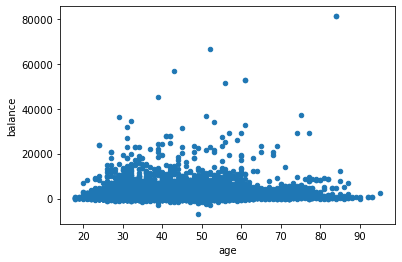

In [109]:
# Vamos analisar os dados como um tudo. 

data_dummies.plot(kind='scatter', x='age', y='balance');

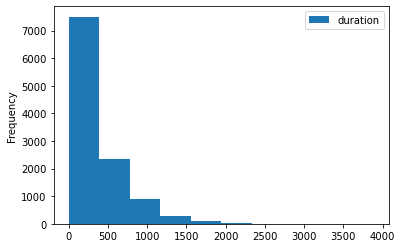

In [110]:
data_dummies.plot(kind='hist', x='poutcome_success', y='duration');


In [111]:
data_dummies[data_dummies.deposit == 1].describe()


,age,balance,duration,campaign,previous,default,housing,loan,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
count,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.0,5289.000000,...,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000,5289.000000
mean,41.670070,1804.267915,537.294574,2.141047,1.170354,0.009832,0.365854,0.091511,1.0,0.004238,...,0.117603,0.520892,0.361505,0.111741,0.463226,0.377387,0.047646,0.116846,0.698242,0.184912
std,13.497781,3501.104777,392.525262,1.921826,2.553272,0.098676,0.481714,0.288361,0.0,0.035686,...,0.322167,0.499611,0.480482,0.315078,0.498693,0.484779,0.213036,0.321267,0.459064,0.388263
min,18.000000,-3058.000000,8.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,31.000000,210.000000,244.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,733.000000,426.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000100,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,50.000000,2159.000000,725.000000,3.000000,1.000000,0.000000,1.000000,0.000000,1.0,0.005128,...,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,95.000000,81204.000000,3881.000000,32.000000,58.000000,1.000000,1.000000,1.000000,1.0,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [118]:
dataset.deposit

0        1
1        1
2        1
3        1
4        1
        ..
11157    0
11158    0
11159    0
11160    0
11161    0
Name: deposit, Length: 11162, dtype: int64

In [ ]:
### Vamos analisar relações de inclusão:
# Tem deposito e emprestimo e casa
# Tem deposito e crédito padrão. 

In [115]:
len(data_dummies[(data_dummies.deposit == 1) & (data_dummies.loan) & (data_dummies.housing)])

265

In [116]:
len(data_dummies[(data_dummies.deposit == 1) & (data_dummies.default ==1)])


52

<AxesSubplot:xlabel='job', ylabel='deposit'>

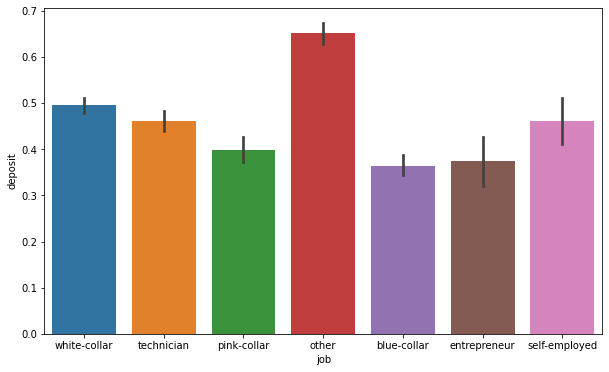

In [113]:
plt.figure(figsize = (10,6))
sns.barplot(x='job', y = 'deposit', data = dataset)

<AxesSubplot:xlabel='poutcome', ylabel='duration'>

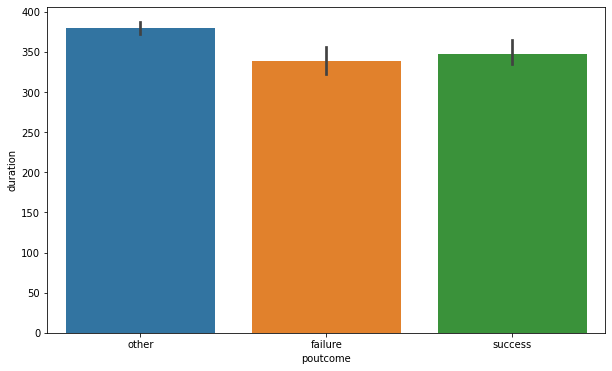

In [119]:
plt.figure(figsize = (10,6))
sns.barplot(x='poutcome', y = 'duration', data = dataset)

<h1> Início da classificação. </h1>

In [121]:
## Printando a matriz de correlação. 

correlated = data_dummies.corr()

<h4> <align = 'center'> Uma matriz de correlação exibe o grau de correlação entre várias interseções de medidas como uma matriz de células retangulares. Cada célula na matriz representa a interseção de duas medidas, e a cor da célula indica o grau de correlação entre essas duas medidas. </h4>

In [122]:
correlated

,age,balance,duration,campaign,previous,default,housing,loan,deposit,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_other,poutcome_success
age,1.000000,0.112300,0.000189,-0.005278,0.020169,-0.011425,-0.168700,-0.031418,0.034901,0.019102,...,0.186349,0.318436,-0.467799,0.231150,-0.094400,-0.101372,0.077761,-0.008071,-0.038992,0.062114
balance,0.112300,1.000000,0.022436,-0.013894,0.030805,-0.060954,-0.077092,-0.084589,0.081129,-0.004379,...,-0.017586,0.025431,-0.014994,-0.000673,-0.070609,0.069128,0.014596,0.001695,-0.034524,0.045603
duration,0.000189,0.022436,1.000000,-0.041557,-0.026716,-0.009760,0.035051,-0.001914,0.451919,-0.014868,...,0.021364,-0.036179,0.023847,0.013405,0.003820,-0.006813,-0.015887,-0.033966,0.042725,-0.022578
campaign,-0.005278,-0.013894,-0.041557,1.000000,-0.049699,0.030975,0.006660,0.034722,-0.128081,-0.026296,...,-0.006828,0.047722,-0.046165,0.019915,-0.013834,-0.005427,0.012976,-0.080188,0.128907,-0.091807
previous,0.020169,0.030805,-0.026716,-0.049699,1.000000,-0.035273,-0.000840,-0.022668,0.139867,0.122076,...,-0.026566,-0.005176,0.023817,-0.024852,-0.004620,0.028146,-0.011898,0.335870,-0.496921,0.325477
default,-0.011425,-0.060954,-0.009760,0.030975,-0.035273,1.000000,0.011076,0.076434,-0.040680,-0.011290,...,0.019633,-0.006819,-0.006255,0.013858,-0.000618,-0.011768,0.005421,-0.024650,0.048403,-0.040272
housing,-0.168700,-0.077092,0.035051,0.006660,-0.000840,0.011076,1.000000,0.076761,-0.203888,-0.029350,...,0.007430,0.036305,-0.043817,0.017002,0.118514,-0.114955,-0.053191,0.087741,0.031375,-0.136299
loan,-0.031418,-0.084589,-0.001914,0.034722,-0.022668,0.076434,0.076761,1.000000,-0.110580,-0.012697,...,0.026463,0.044148,-0.065288,0.006854,0.079583,-0.067513,-0.050249,0.006264,0.053686,-0.080370
deposit,0.034901,0.081129,0.451919,-0.128081,0.139867,-0.040680,-0.203888,-0.110580,1.000000,0.034457,...,0.005228,-0.092157,0.094632,-0.063002,-0.051952,0.094598,0.014355,0.020714,-0.224785,0.286642
recent_pdays,0.019102,-0.004379,-0.014868,-0.026296,0.122076,-0.011290,-0.029350,-0.012697,0.034457,1.000000,...,-0.020253,0.009583,0.003736,-0.007034,-0.017129,0.017346,0.013590,0.051422,-0.126890,0.119598


Text(0.5, 1.0, 'Mapa de calor da matriz de correlação')

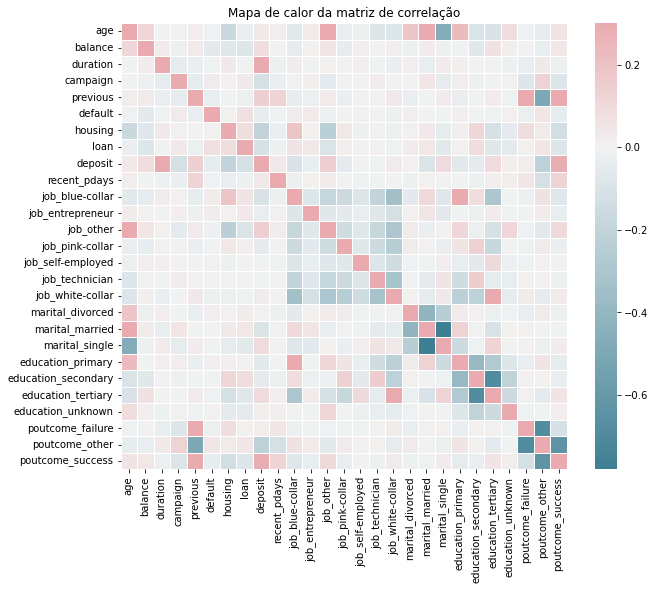

In [123]:
## Agora, vamos coloriiiiiiiir!!! Mapa de calor:

# Heatmap
plt.figure(figsize = (10,10))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(correlated, xticklabels=correlated.columns.values, yticklabels=correlated.columns.values, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .82})
plt.title('Mapa de calor da matriz de correlação')

In [126]:
## Tiramos de deposito ele mesmo para termos a matriz de correlação ordenada. 

corr_deposite = pd.DataFrame(correlated['deposit'].drop('deposit'))
corr_deposite.sort_values(by = 'deposit', ascending = True)

,deposit
poutcome_other,-0.224785
housing,-0.203888
campaign,-0.128081
loan,-0.110580
job_blue-collar,-0.100840
marital_married,-0.092157
education_primary,-0.063002
education_secondary,-0.051952
job_pink-collar,-0.051717
default,-0.040680


In [133]:
bankcl = data_dummies

##Início do modelo.

In [128]:
# Train-Test split: 30% test data
data_drop_deposite = bankcl.drop('deposit', 1)
label = bankcl.deposit
data_train, data_test, label_train, label_test = train_test_split(data_drop_deposite, label, test_size = 0.3, random_state = 100)

<h4> Como você escolhe a profundidade máxima na árvore de decisão?
Podemos definir a profundidade máxima de nossa árvore de decisão usando o parâmetro max_depth. Quanto maior o valor de max_depth, mais complexa será sua árvore. O erro de treinamento diminuirá fora do curso se aumentarmos o valor max_depth, mas quando nossos dados de teste entrarem em cena, obteremos uma precisão muito ruim. </h4>

In [138]:
# Decision tree with depth = 2
dt2 = tree.DecisionTreeClassifier(random_state=1, max_depth=2)
dt2.fit(data_train, label_train)
dt2_score_train = dt2.score(data_train, label_train)
print("Training score: ",dt2_score_train)
dt2_score_test = dt2.score(data_test, label_test)
print("Testing score: ",dt2_score_test)

Training score:  0.7254575707154742
Testing score:  0.7318602567930725


In [139]:
# Decision tree with depth = 3
dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)
dt3.fit(data_train, label_train)
dt3_score_train = dt3.score(data_train, label_train)
print("Training score: ",dt3_score_train)
dt3_score_test = dt3.score(data_test, label_test)
print("Testing score: ",dt3_score_test)

Training score:  0.7794701139127096
Testing score:  0.771275007464915


In [140]:
# Decision tree with depth = 4
dt4 = tree.DecisionTreeClassifier(random_state=1, max_depth=4)
dt4.fit(data_train, label_train)
dt4_score_train = dt4.score(data_train, label_train)
print("Training score: ",dt4_score_train)
dt4_score_test = dt4.score(data_test, label_test)
print("Testing score: ",dt4_score_test)

Training score:  0.7899654422116984
Testing score:  0.7811286951328755


In [141]:
# Decision tree with depth = 6
dt6 = tree.DecisionTreeClassifier(random_state=1, max_depth=6)
dt6.fit(data_train, label_train)
dt6_score_train = dt6.score(data_train, label_train)
print("Training score: ",dt6_score_train)
dt6_score_test = dt6.score(data_test, label_test)
print("Testing score: ",dt6_score_test)

Training score:  0.8103161397670549
Testing score:  0.7954613317408181


In [142]:
# Quando não setamos max_depth por padrão é 30.
dt1 = tree.DecisionTreeClassifier()
dt1.fit(data_train, label_train)
dt1_score_train = dt1.score(data_train, label_train)
print("Training score: ", dt1_score_train)
dt1_score_test = dt1.score(data_test, label_test)
print("Testing score: ", dt1_score_test)

Training score:  1.0
Testing score:  0.7309644670050761


In [143]:
# Vamos comparar depths e os scores?

print('{:10} {:20} {:20}'.format('depth', 'Training score','Testing score'))
print('{:10} {:20} {:20}'.format('-----', '--------------','-------------'))
print('{:1} {:>25} {:>20}'.format(2, dt2_score_train, dt2_score_test))
print('{:1} {:>25} {:>20}'.format(3, dt3_score_train, dt3_score_test))
print('{:1} {:>25} {:>20}'.format(4, dt4_score_train, dt4_score_test))
print('{:1} {:>25} {:>20}'.format(6, dt6_score_train, dt6_score_test))
print('{:1} {:>23} {:>20}'.format("max", dt1_score_train, dt1_score_test))


depth      Training score       Testing score       
-----      --------------       -------------       
2        0.7254575707154742   0.7318602567930725
3        0.7794701139127096    0.771275007464915
4        0.7899654422116984   0.7811286951328755
6        0.8103161397670549   0.7954613317408181
max                     1.0   0.7309644670050761


<h4> Pode-se ver que, quanto maior a profundidade, a pontuação de treinamento aumenta e combina perfeitamente com o conjunto de dados de treinamento - Overfitting. Por mais alta que seja a profundidade da árvore, ela superajusta (Overfitting) o conjunto de dados de treinamento. Então não adianta ficar aumentando a profundidade da árvore. De acordo com as observações acima, a árvore com uma profundidade de 3 parece mais razoável, pois as pontuações de treinamento e teste são razoavelmente altas. </h4>

In [152]:
# Gerando a árvore de depth = 3
# Criando uma lista de features. 
features = bankcl.columns.tolist()
features.remove('deposit')

#Vai exportar a descrição da árvore para seu diretório. 
tree.export_graphviz(dt3, out_file='tree_depth_2.dot', feature_names=features)

In [153]:
features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default',
 'housing',
 'loan',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success']

[Text(0.5, 0.875, 'x[2] <= 205.5\ngini = 0.499\nsamples = 7813\nvalue = [4102, 3711]'),
 Text(0.25, 0.625, 'x[25] <= 0.5\ngini = 0.328\nsamples = 3117\nvalue = [2473, 644]'),
 Text(0.125, 0.375, 'x[2] <= 129.5\ngini = 0.273\nsamples = 2903\nvalue = [2430, 473]'),
 Text(0.0625, 0.125, 'gini = 0.15\nsamples = 1690\nvalue = [1552, 138]'),
 Text(0.1875, 0.125, 'gini = 0.4\nsamples = 1213\nvalue = [878, 335]'),
 Text(0.375, 0.375, 'x[2] <= 119.5\ngini = 0.321\nsamples = 214\nvalue = [43, 171]'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 57\nvalue = [27, 30]'),
 Text(0.4375, 0.125, 'gini = 0.183\nsamples = 157\nvalue = [16, 141]'),
 Text(0.75, 0.625, 'x[2] <= 472.5\ngini = 0.453\nsamples = 4696\nvalue = [1629, 3067]'),
 Text(0.625, 0.375, 'x[6] <= 0.5\ngini = 0.498\nsamples = 2624\nvalue = [1238, 1386]'),
 Text(0.5625, 0.125, 'gini = 0.432\nsamples = 1546\nvalue = [488, 1058]'),
 Text(0.6875, 0.125, 'gini = 0.423\nsamples = 1078\nvalue = [750, 328]'),
 Text(0.875, 0.375, 'x[2] <= 648.5\n

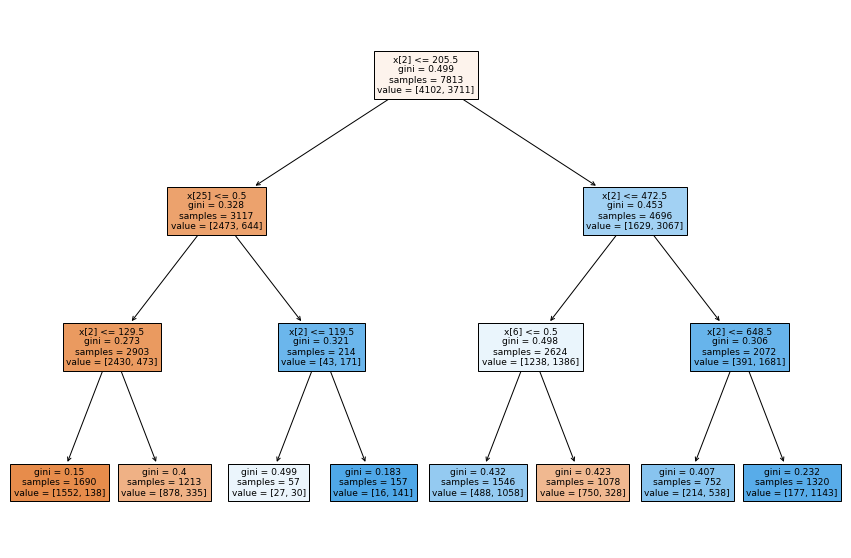

In [154]:
# import export_graphviz
from sklearn import tree

# Visualizing the decision tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt3, filled=True)

In [155]:
dt3.classes_


array([0, 1])

In [156]:
# Create a feature vector
features = data_drop_deposite.columns.tolist()

features

['age',
 'balance',
 'duration',
 'campaign',
 'previous',
 'default',
 'housing',
 'loan',
 'recent_pdays',
 'job_blue-collar',
 'job_entrepreneur',
 'job_other',
 'job_pink-collar',
 'job_self-employed',
 'job_technician',
 'job_white-collar',
 'marital_divorced',
 'marital_married',
 'marital_single',
 'education_primary',
 'education_secondary',
 'education_tertiary',
 'education_unknown',
 'poutcome_failure',
 'poutcome_other',
 'poutcome_success']

In [157]:
# Vamos verificar as features mais importantes com depth=3.

dt3 = tree.DecisionTreeClassifier(random_state=1, max_depth=3)

# Fit the decision tree classifier
dt3.fit(data_train, label_train)

fi = dt3.feature_importances_

l = len(features)
for i in range(0,len(features)):
    print('{:.<20} {:3}'.format(features[i],fi[i]))

age................. 0.0
balance............. 0.0
duration............ 0.7472221565328201
campaign............ 0.0
previous............ 0.0
default............. 0.0
housing............. 0.13452579915724563
loan................ 0.0
recent_pdays........ 0.0
job_blue-collar..... 0.0
job_entrepreneur.... 0.0
job_other........... 0.0
job_pink-collar..... 0.0
job_self-employed... 0.0
job_technician...... 0.0
job_white-collar.... 0.0
marital_divorced.... 0.0
marital_married..... 0.0
marital_single...... 0.0
education_primary... 0.0
education_secondary. 0.0
education_tertiary.. 0.0
education_unknown... 0.0
poutcome_failure.... 0.0
poutcome_other...... 0.0
poutcome_success.... 0.11825204430993438


In [158]:
# Duração é a feature mais importante. 
# Vamos analisá-la estatisticamente. 
print("Mean duration   : ", data_drop_deposite.duration.mean())
print("Maximun duration: ", data_drop_deposite.duration.max())
print("Minimum duration: ", data_drop_deposite.duration.min())

Mean duration   :  371.99381831213043
Maximun duration:  3881
Minimum duration:  2


In [160]:
## Usando apenas a feature 'duration' para predição:

# Predict: duration = 371 sec

print(dt3.predict_proba(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
print(dt3.predict(np.array([0, 0, 371, 0, 0, 0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0]).reshape(1, -1)))
# column 0: probability for class 0 (not signed for term deposite) & column 1: probability for class 1
# Probability of Successful deposite = 0.51484432 

[[0.3156533 0.6843467]]
[1]


/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [161]:
# Predição usando conjunto de teste:
preds = dt3.predict(data_test)

# Calculate accuracy
print("\nAccuracy score: \n{}".format(metrics.accuracy_score(label_test, preds)))

# Make predictions on the test set using predict_proba
probs = dt3.predict_proba(data_test)[:,1]

# Calculate the AUC metric
print("\nArea Under Curve: \n{}".format(metrics.roc_auc_score(label_test, probs)))


Accuracy score: 
0.771275007464915

Area Under Curve: 
0.8311391314367013


In [162]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

print("Confusion Matrix: ",
        confusion_matrix(label_test, preds))

Confusion Matrix:  [[1378  393]
 [ 373 1205]]


In [163]:
print("Confusion Matrix: ",
        confusion_matrix(label_test, preds))
      
print ("Accuracy : ",
accuracy_score(label_test,preds)*100)
  
print("Report : ",
classification_report(label_test, preds))

Confusion Matrix:  [[1378  393]
 [ 373 1205]]
Accuracy :  77.12750074649149
Report :                precision    recall  f1-score   support

           0       0.79      0.78      0.78      1771
           1       0.75      0.76      0.76      1578

    accuracy                           0.77      3349
   macro avg       0.77      0.77      0.77      3349
weighted avg       0.77      0.77      0.77      3349

